<a href="https://colab.research.google.com/github/jamunozlab/introductory_mechanics_fall_2022/blob/main/lecture_notebooks/Phys_2320_W4_L6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

You are the owner of the [sports analytics](https://youtu.be/wamWTkyDmLo) company Physics Physical LLC. This company in the future will use computers to simulate athletes from the cell biophysics up. Unfortunately, Skynet will take over this intellectual property and use it to create Terminators, wiping out the human race. But for now, you are in charge of training top distance runner Jorgino for the [Miner Dash](https://www.utep.edu/chs/minerdash/). As a baseline, you make Jorginho run on the treadmill every Sunday. Because you are lazy and don't want to remember too many things, your treadmill program consists simply of increasing the starting speed by 0.1 miles per hour (mph) each Sunday, and the program remains the same: increase the speed by 0.1 mph every 1/3 of a mile until reaching 6.22 miles (10 kilometers). Last Sunday, Jorginho started at 6.1 mph, but the US Open kept getting him distracted. His time is below. How closely did he follow the program?

His schedule is below

```
# Date         # Starting speed
# 9/4/22         6.1 mph
# 9/11/22        6.2 mph
# 9/18/22        6.3 mph
# 9/25/22        6.4 mph
# 10/2/22        6.5 mph
# 10/9/22        6.6 mph
# 10/16/22       6.7 mph  <-- Last Sunday for baseline
# 10/25/22       <-- Race day (real deal)
```


9/4/22

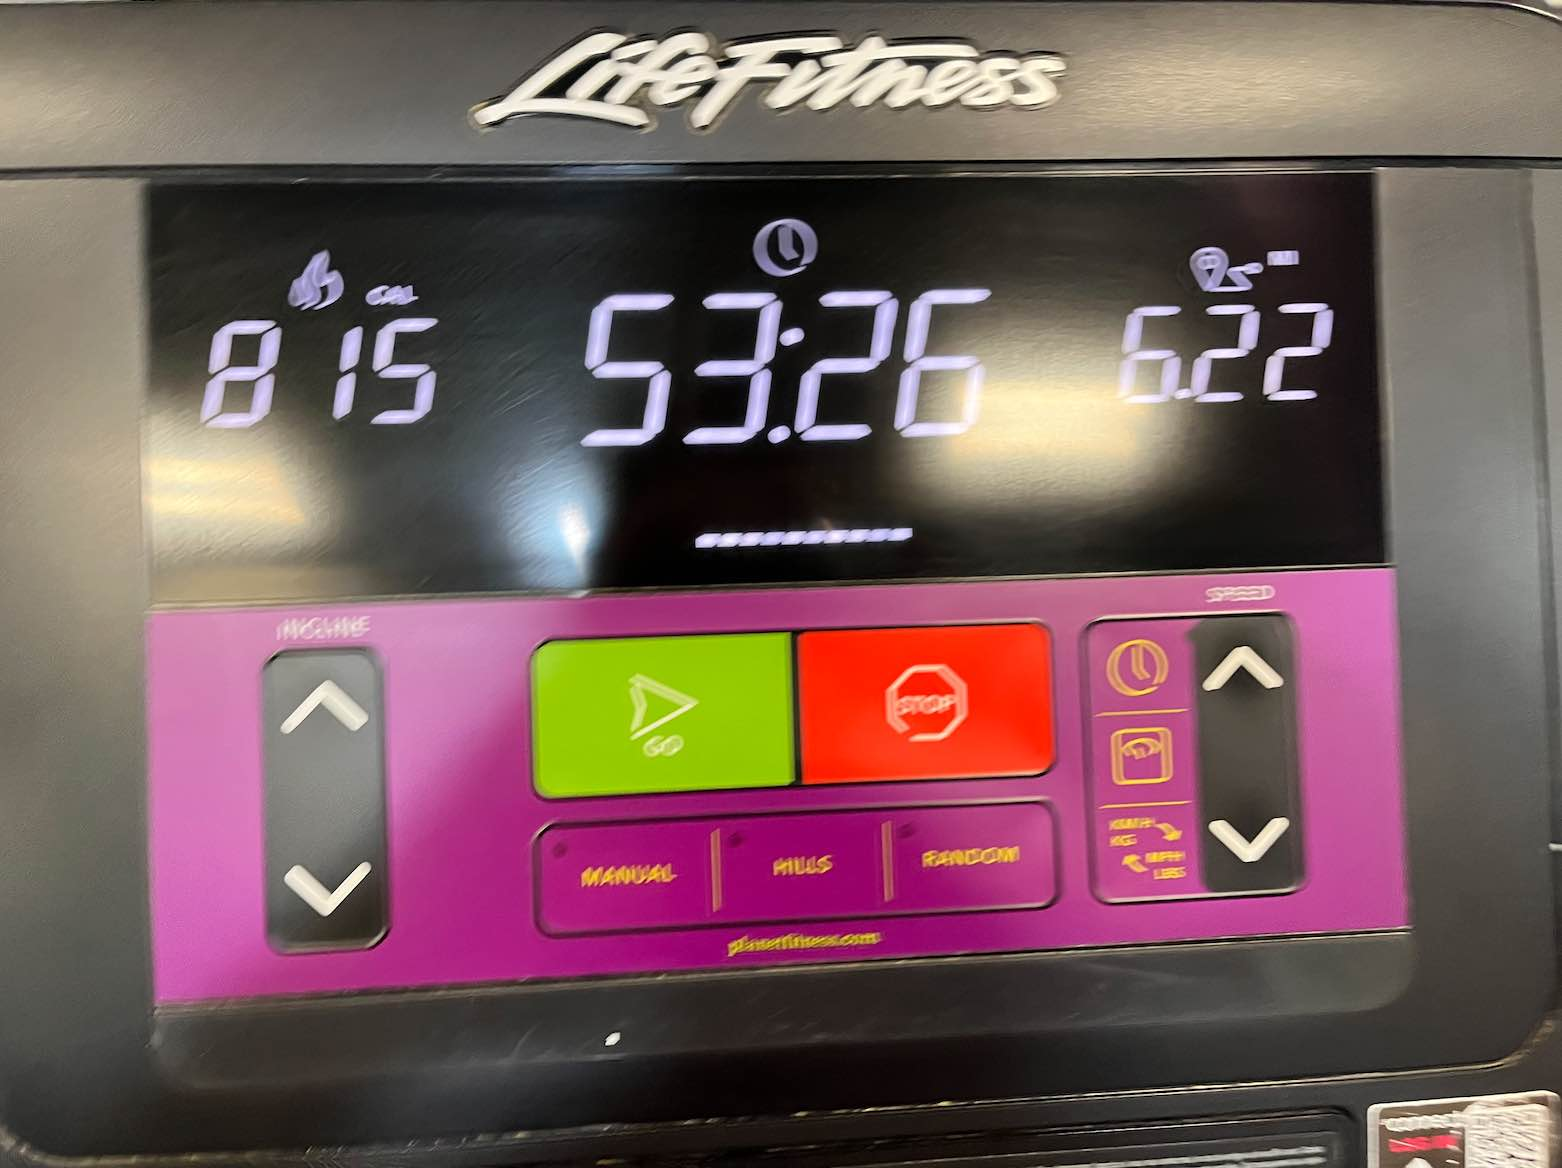

In [Exercise 2](https://github.com/jamunozlab/introductory_mechanics_fall_2022/blob/main/exercises/Ph_2320_E2.ipynb) we used the following Python function to calculate the average velocity


In [ ]:
def calculate_velocity(final_position, initial_position, final_time, initial_time):
  return ( final_position - initial_position ) / ( final_time - initial_time )

Below, complete the Python function that computes the time required to run a certain distance at a given speed.

In [ ]:
# Calculate time
def calculate_time(final_position, initial_position, velocity):
  return ( final_position - initial_position ) / ( velocity )

Test the function with known values. For example, traveling at 50 mph for 100 miles should return 2 hours. Evaluate the cell below to confirm. 

In [ ]:
final_position = 100 # miles
initial_position = 0 # miles
velocity = 50 # mph
time = calculate_time(final_position, initial_position, velocity)
print(time, 'hours')

2.0 hours


Whereas running at 8 meters per second for 400 meters should give 50 seconds. Evaluate the cell below to confirm. Notice that we are keeping track of the units manually and hence need to be extra careful to ensure that the units are consistent. Good scientific code should take care of units on its own, but keeping track of it manually is fine for now.



In [ ]:
final_position = 400 # meters
initial_position = 0 # meters
velocity = 8 # meters per second
time = calculate_time(final_position, initial_position, velocity)
print(time, 'seconds')

50.0 seconds


The first 1/3 of a mile should have taken Jorginho 3 minutes and 17 seconds. Evaluate the cell below, are remember that there are 60 minutes in 1 hour and 60 seconds in 1 minute.

In [ ]:
final_position = 1/3 # miles
initial_position = 0 # miles
velocity = 6.1 # mph
time_first_third = calculate_time(final_position, initial_position, velocity)
print(time_first_third, 'hours')

0.0546448087431694 hours


By evaluating the same Python function again but with different values for the positions and velocity we can compute how long it took Jorginho to run his first mile. 


In [ ]:
final_position = 2/3 # miles
initial_position = 1/3 # miles
velocity = 6.2 # mph
time_second_third = calculate_time(final_position, initial_position, velocity)
print(time_second_third, 'hours')

0.05376344086021505 hours


In [ ]:
final_position = 3/3 # miles
initial_position = 2/3 # miles
velocity = 6.3 # mph
time_third_third = calculate_time(final_position, initial_position, velocity)
print(time_third_third, 'hours')

0.052910052910052914 hours


In [ ]:
time_first_mile = time_first_third + time_second_third + time_third_third
print('It took Jorginho', time_first_mile, 'hours to run his first mile')

It took Jorginho 0.16131830251343734 hours to run his first mile


Hours is an inconvenient unit for time when you are running. Minutes and seconds are better. The following function does the conversion for you. 

In [ ]:
def convert_hours_to_minsec(time_in_hours):
  time_in_minutes = time_in_hours * 60
  minutes = int(time_in_minutes)
  reminder = time_in_minutes - minutes
  seconds = reminder * 60
  return minutes, seconds

Jorginho ran his first mile in 9 minutes and 41 seconds, as you should be able to confirm by evaluating the cell below. The time it takes a person to run 1 mile is known as the 'pace' in the sport. 

In [ ]:
minutes, seconds = convert_hours_to_minsec(time_first_mile)
print(minutes,'minutes', seconds, 'seconds')

9 minutes 40.74588904837441 seconds


That was useful, but it took too much code. We could save time using a Python 'for' loop

In [ ]:
position_list = [0, 1/3, 2/3, 3/3]
velocity_list = [   6.1, 6.2, 6.3]
for list_index in range(1, 4):
  final_position = position_list[list_index]
  initial_position = position_list[list_index - 1]
  velocity = velocity_list[list_index - 1]
  time = calculate_time(final_position, initial_position, velocity)
  print(time, 'hours')

0.0546448087431694 hours
0.05376344086021505 hours
0.052910052910052914 hours


By introducing the variable total_time to the times computed in each iteration, we can keep track of the things



In [ ]:
position_list = [0, 1/3, 2/3, 3/3]
velocity_list = [   6.1, 6.2, 6.3]
total_time = 0
for list_index in range(1, 4):
  final_position = position_list[list_index]
  initial_position = position_list[list_index - 1]
  velocity = velocity_list[list_index - 1]
  time = calculate_time(final_position, initial_position, velocity)
  total_time = total_time + time
  print(time, 'hours')

print('Total is:', total_time, 'hours')
minutes, seconds = convert_hours_to_minsec(total_time)
print('Total is:', minutes,'minutes', seconds, 'seconds')

0.0546448087431694 hours
0.05376344086021505 hours
0.052910052910052914 hours
Total is: 0.16131830251343734 hours
Total is: 9 minutes 40.74588904837441 seconds


Modify the code above to answer the following questions:


1.   How close is your prediction of the time it should have taken Jorginho to run 6.22 miles (10 kilometers) to his actual time? Provide your answer in seconds. 
2.   Use the function Python calculate_velocity() to compute Jorginho's average velocity. What is it?
3.   What does your code predict his time will be this coming Sunday, when he will be starting at 6.2 mph? 
4.   Unfortunately, Jorginho is increasingly evermore becoming an old person, so you cap his maximum speed at 8.0 mph in order to avoid injuries. That is, once Jorginho gets to 8 mph, he will keep that speed until he finishes the 10k. What will be his time on 10/16/22? (Hint: just under 50 minutes). 



In [ ]:
position_list = [0, 1/3, 2/3, 3/3, 4/3, 5/3, 6/3, 7/3, 8/3, 9/3, 10/3, 11/3, 12/3, 13/3, 14/3, 15/3, 16/3, 17/3, 18/3, 6.22]
velocity_list = [   6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5,  7.6,  7.7,  7.8,  7.9,  8.0,  8.0,  8.0,  8.0,  8.0,  8.0]
total_time = 0
for list_index in range(1, 20):
  #print(position_list[list_index])
  final_position = position_list[list_index]
  initial_position = position_list[list_index - 1]
  velocity = velocity_list[list_index - 1]
  time = calculate_time(final_position, initial_position, velocity)
  total_time = total_time + time
  print(time, 'hours')

print('Total is:', total_time, 'hours')
minutes, seconds = convert_hours_to_minsec(total_time)
print('Total is:', minutes,'minutes', seconds, 'seconds')

0.04975124378109452 hours
0.049019607843137254 hours
0.04830917874396135 hours
0.04761904761904761 hours
0.04694835680751176 hours
0.04629629629629629 hours
0.04566210045662102 hours
0.045045045045045 hours
0.04444444444444447 hours
0.043859649122807036 hours
0.043290043290043254 hours
0.04273504273504276 hours
0.04219409282700418 hours
0.04166666666666674 hours
0.04166666666666663 hours
0.04166666666666663 hours
0.04166666666666674 hours
0.04166666666666663 hours
0.02749999999999997 hours
Total is: 0.8310074823453898 hours
Total is: 49 minutes 51.626936443403224 seconds


In [ ]:
position_list = [0, 1/3, 2/3, 3/3, 4/3, 5/3, 6/3, 7/3, 8/3, 9/3, 10/3, 11/3, 12/3, 13/3, 14/3, 15/3, 16/3, 17/3, 18/3, 6.22]
velocity_list = [   6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,  7.0,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9]
total_time = 0
for list_index in range(1, 20):
  #print(position_list[list_index])
  final_position = position_list[list_index]
  initial_position = position_list[list_index - 1]
  velocity = velocity_list[list_index - 1]
  time = calculate_time(final_position, initial_position, velocity)
  total_time = total_time + time
  print(time, 'hours')

print('Total is:', total_time, 'hours')
minutes, seconds = convert_hours_to_minsec(total_time)
print('Total is:', minutes,'minutes', seconds, 'seconds')

0.0546448087431694 hours
0.05376344086021505 hours
0.052910052910052914 hours
0.05208333333333332 hours
0.05128205128205131 hours
0.0505050505050505 hours
0.04975124378109455 hours
0.04901960784313721 hours
0.04830917874396137 hours
0.04761904761904764 hours
0.0469483568075117 hours
0.046296296296296315 hours
0.04566210045662097 hours
0.045045045045045126 hours
0.044444444444444405 hours
0.04385964912280698 hours
0.043290043290043365 hours
0.0427350427350427 hours
0.027848101265822753 hours
Total is: 0.8960168950847475 hours
Total is: 53 minutes 45.66082230509096 seconds


In [ ]:
# Q: How close is your prediction of the time it should have taken Jorginho to run 6.22 miles
# (10 kilometers) to his actual time? Provide your answer in seconds.
# A: The prediction is 53:45, but Jorginho ran the 10k in 53:26, so he was 19 seconds ahead. 

In [ ]:
# Q: Use the function Python calculate_velocity() to compute Jorginho's average velocity. What is it?
# His time was 53:26, so 0.89055 hours. His average velocity, hence, was 6.98 mph
# With the accuracy that we are carrying, it is fair to say that his average speed was 7.0 mph

In [ ]:
minutes_to_hours = 53./60.
seconds_to_hours = 26/3600
hours = minutes_to_hours + seconds_to_hours
print(hours)

0.8905555555555555


In [ ]:
calculate_velocity(final_position=6.22, initial_position=0, final_time=hours, initial_time=0)

6.984404242046163

In [ ]:
# For his run on Sunday 9/11/22, Jorginho's 10K time is predicted to be very close to 53 minutes
# See below, the prediction was pretty close. 

In [ ]:
position_list = [0, 1/3, 2/3, 3/3, 4/3, 5/3, 6/3, 7/3, 8/3, 9/3, 10/3, 11/3, 12/3, 13/3, 14/3, 15/3, 16/3, 17/3, 18/3, 6.22]
velocity_list = [   6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,  7.0,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9, 8.0]
total_time = 0
for list_index in range(1, 20):
  #print(position_list[list_index])
  final_position = position_list[list_index]
  initial_position = position_list[list_index - 1]
  velocity = velocity_list[list_index - 1]
  time = calculate_time(final_position, initial_position, velocity)
  total_time = total_time + time
  print(time, 'hours')

print('Total is:', total_time, 'hours')
minutes, seconds = convert_hours_to_minsec(total_time)
print('Total is:', minutes,'minutes', seconds, 'seconds')

0.05376344086021505 hours
0.05291005291005291 hours
0.052083333333333336 hours
0.05128205128205127 hours
0.05050505050505053 hours
0.049751243781094516 hours
0.049019607843137275 hours
0.04830917874396131 hours
0.04761904761904764 hours
0.04694835680751176 hours
0.04629629629629625 hours
0.04566210045662102 hours
0.045045045045045 hours
0.04444444444444452 hours
0.04385964912280698 hours
0.043290043290043254 hours
0.04273504273504281 hours
0.04219409282700418 hours
0.02749999999999997 hours
Total is: 0.8832180779027595 hours
Total is: 52 minutes 59.58508044993437 seconds


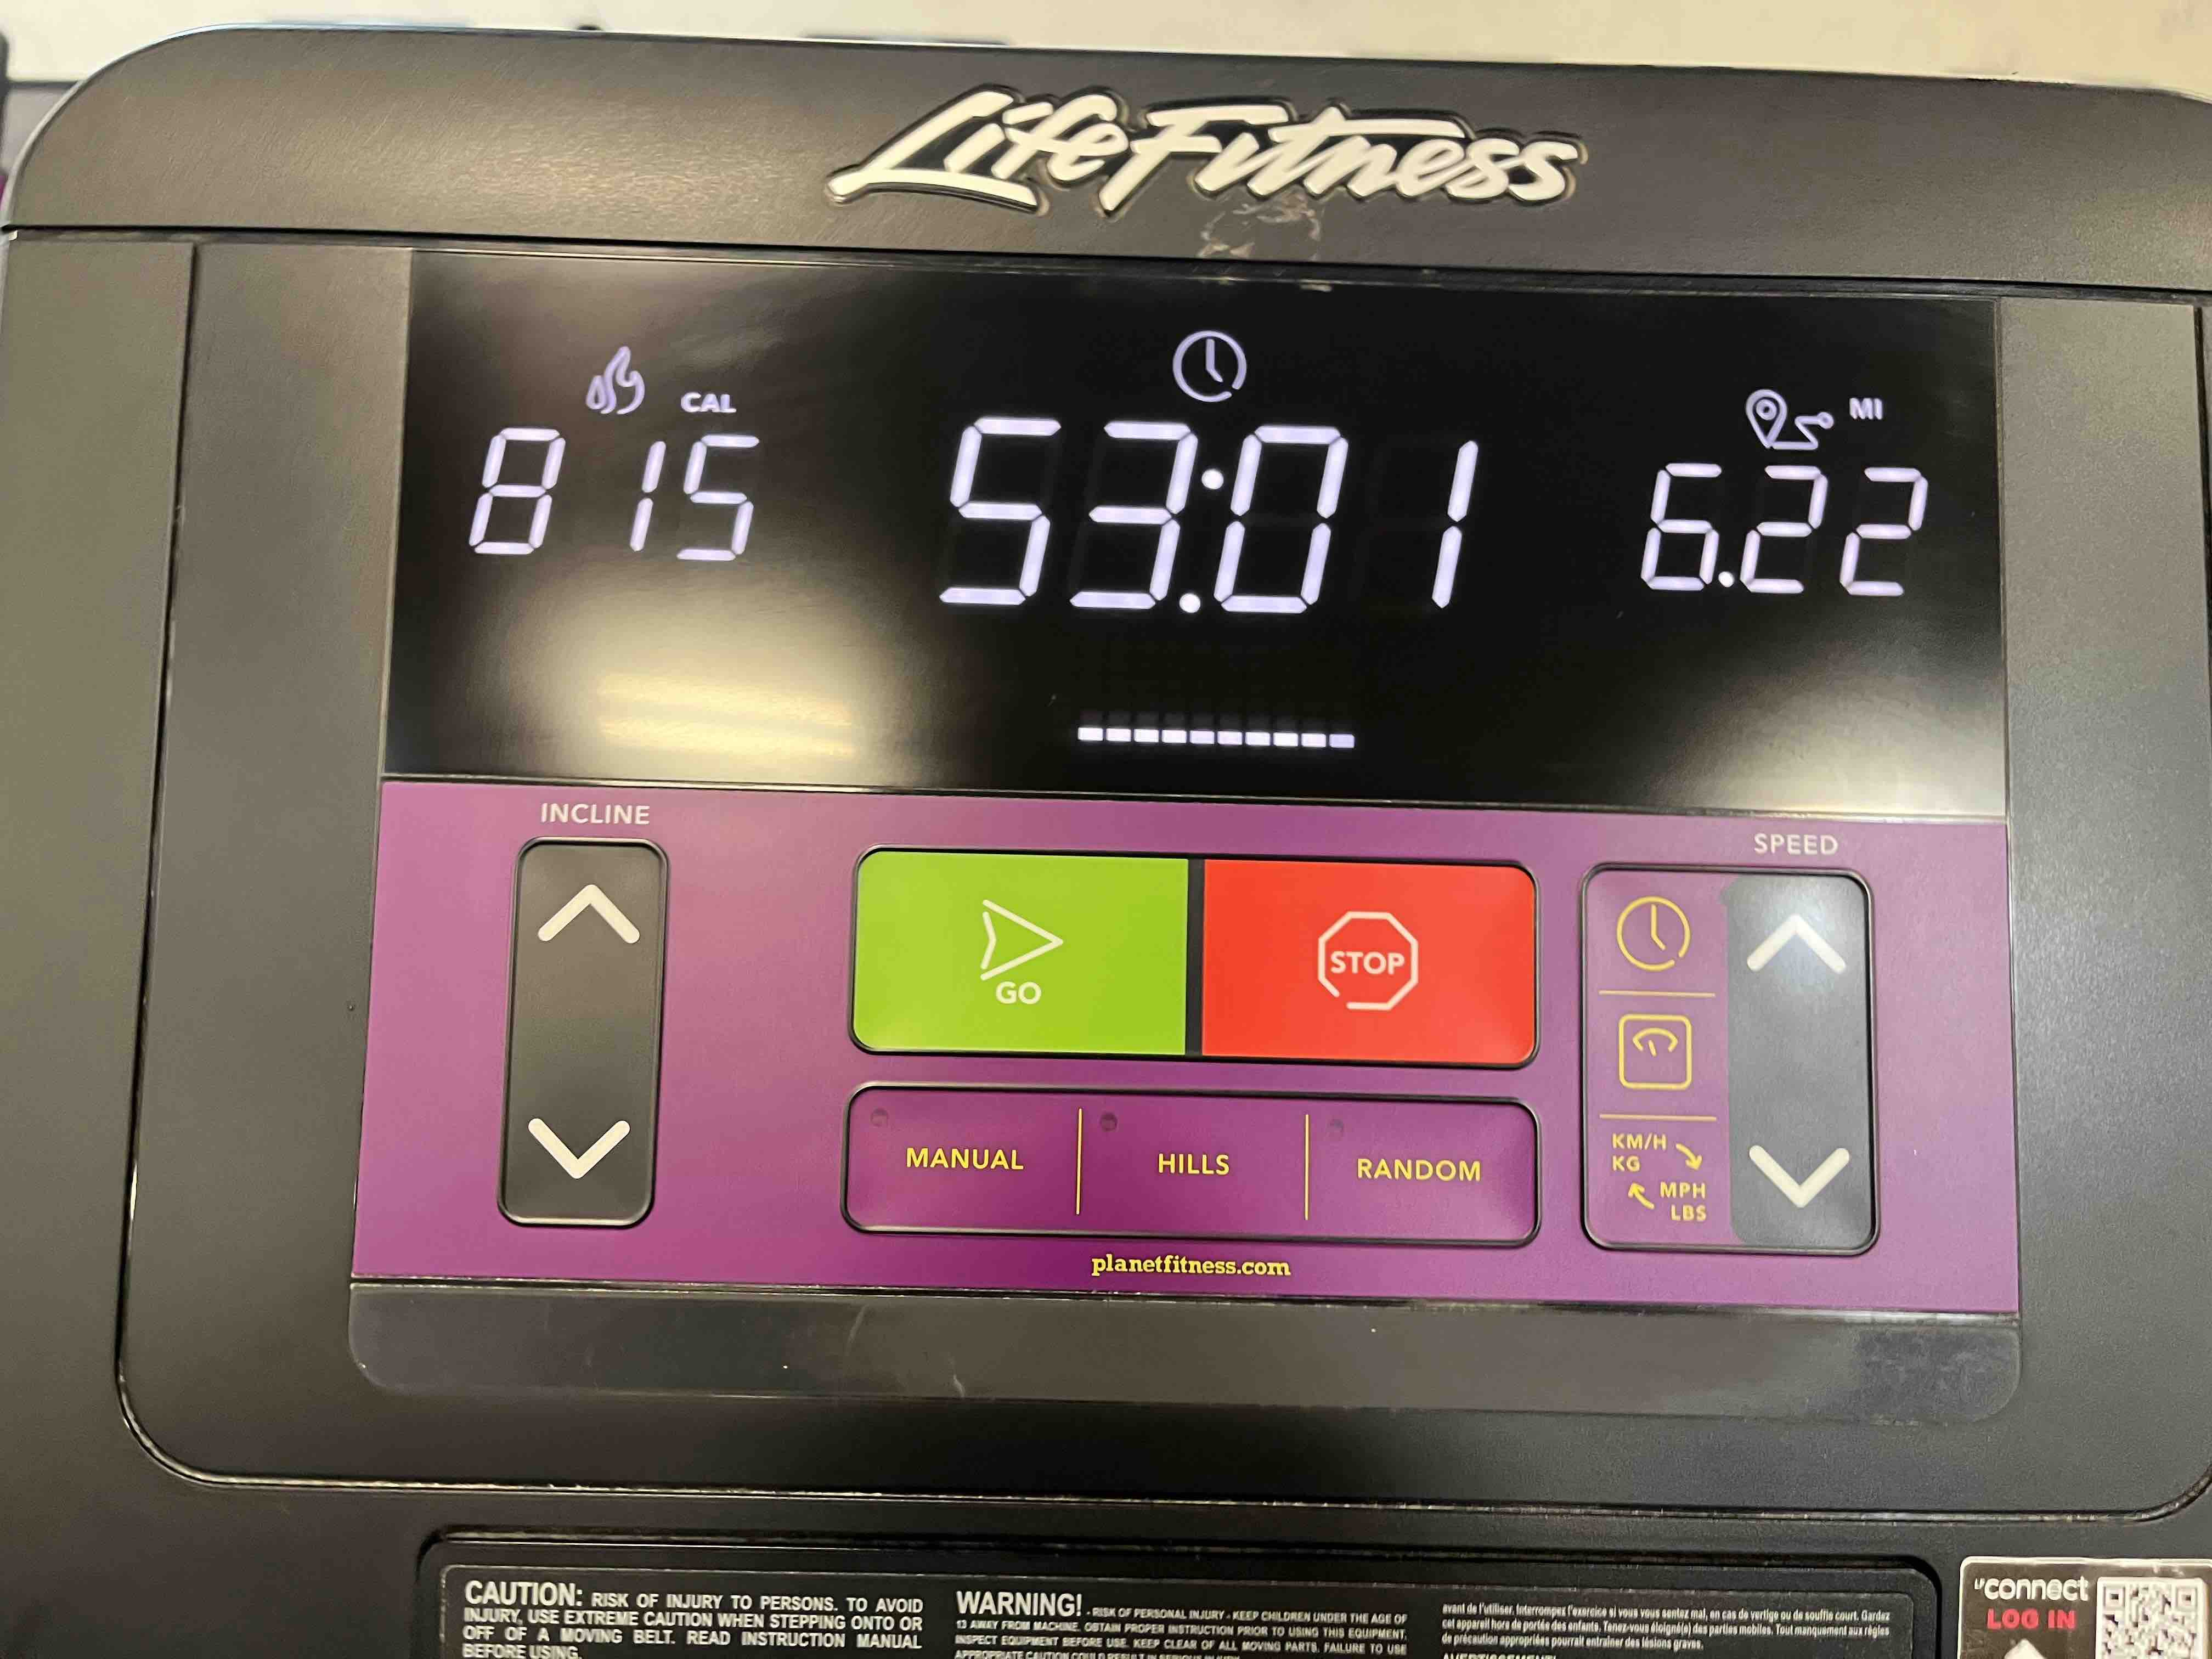

In [ ]:
# For his run on Sunday 10/16/22, Jorginho's 10K time is predicted to be very close to 49 minutes and 51 seconds
# See below.

In [ ]:
position_list = [0, 1/3, 2/3, 3/3, 4/3, 5/3, 6/3, 7/3, 8/3, 9/3, 10/3, 11/3, 12/3, 13/3, 14/3, 15/3, 16/3, 17/3, 18/3, 6.22]
velocity_list = [   6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5,  7.6,  7.7,  7.8,  7.9,  8.0,  8.0,  8.0,  8.0,  8.0,  8.0]
total_time = 0
for list_index in range(1, 20):
  #print(position_list[list_index])
  final_position = position_list[list_index]
  initial_position = position_list[list_index - 1]
  velocity = velocity_list[list_index - 1]
  time = calculate_time(final_position, initial_position, velocity)
  total_time = total_time + time
  print(time, 'hours')

print('Total is:', total_time, 'hours')
minutes, seconds = convert_hours_to_minsec(total_time)
print('Total is:', minutes,'minutes', seconds, 'seconds')

0.04975124378109452 hours
0.049019607843137254 hours
0.04830917874396135 hours
0.04761904761904761 hours
0.04694835680751176 hours
0.04629629629629629 hours
0.04566210045662102 hours
0.045045045045045 hours
0.04444444444444447 hours
0.043859649122807036 hours
0.043290043290043254 hours
0.04273504273504276 hours
0.04219409282700418 hours
0.04166666666666674 hours
0.04166666666666663 hours
0.04166666666666663 hours
0.04166666666666674 hours
0.04166666666666663 hours
0.02749999999999997 hours
Total is: 0.8310074823453898 hours
Total is: 49 minutes 51.626936443403224 seconds
